<a href="https://colab.research.google.com/github/gauravtailor8520/Mnist-Classification-with-ANN/blob/main/%5BANN%5D_Making_Model_for_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST Classification with Artificial Neural Network (ANN)

#Project Overview
In this project, we build and train an Artificial Neural Network (ANN) to classify handwritten digits from the MNIST dataset. The MNIST dataset is a well-known benchmark in the field of machine learning and computer vision, consisting of 60,000 training images and 10,000 test images of handwritten digits from 0 to 9.

###Objectives
- Load and preprocess the MNIST dataset: Normalize the pixel values and convert the labels to categorical format.
- Build the ANN model: Create a neural network with multiple dense layers for feature extraction and classification.
- Train the model: Use the training data to train the neural network.
- Evaluate the model: Assess the performance of the trained model on the test data.
- Visualize training history: Plot the accuracy and loss curves to analyze the training process.
- Make predictions: Use the trained model to make predictions on new data and visualize the results.
###Steps and Implementation
1. Import Libraries: We use TensorFlow and Keras for building and training the neural network, and Matplotlib for visualizing the data and results.

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

2. oad and Preprocess the Data:

- Load the MNIST dataset.
- Normalize the images to have pixel values between 0 and 1.
- Convert the labels to categorical one-hot encoding.

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


3. Build the ANN Model:

- Create a sequential model.
- Add a Flatten layer to convert the 2D images into 1D vectors.
- Add Dense layers with ReLU activation for feature extraction.
- Add a final Dense layer with softmax activation for classification.

In [13]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


4. Compile the Model:

- Use the Adam optimizer.
- Use categorical crossentropy as the loss function.
- Track the accuracy metric

In [14]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


- Train the Model:

- Train the model with the training data for a specified number of epochs.
- Validate the model using the test data.


In [15]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2385 - accuracy: 0.9295 - val_loss: 0.1164 - val_accuracy: 0.9661
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1032 - accuracy: 0.9682 - val_loss: 0.0913 - val_accuracy: 0.9727
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0707 - accuracy: 0.9776 - val_loss: 0.0915 - val_accuracy: 0.9709
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0540 - accuracy: 0.9829 - val_loss: 0.0854 - val_accuracy: 0.9731
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0418 - accuracy: 0.9864 - val_loss: 0.0769 - val_accuracy: 0.9787
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0350 - accuracy: 0.9883 - val_loss: 0.1109 - val_accuracy: 0.9700
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0272 - accuracy: 0.9907 - val_loss: 0.0930 - val_accuracy:

6. Evaluate the Model:

- Evaluate the trained model's performance on the test dataset

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


313/313 [==============================] - 1s 2ms/step - loss: 0.0933 - accuracy: 0.9773
Test accuracy: 0.9772999882698059


7. Plot Training History:

- Plot the accuracy and loss curves for both training and validation data.

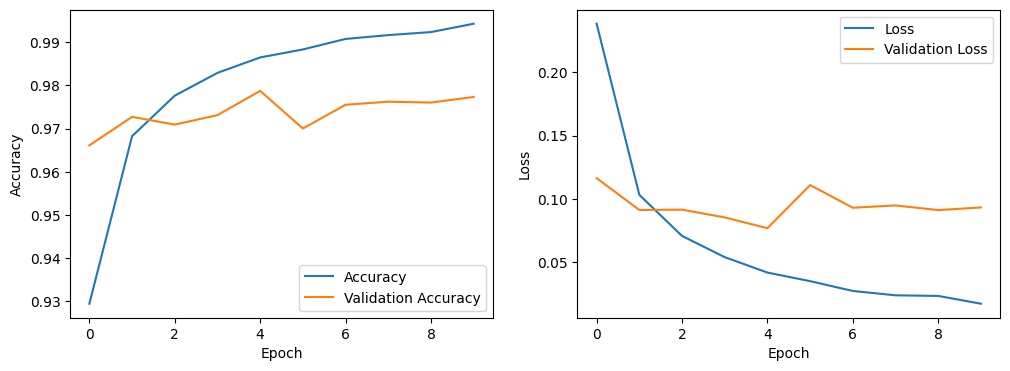

In [17]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


8. Make Predictions:

- Use the trained model to make predictions on the test data.
- Display the first few predictions along with the corresponding images.

313/313 [==============================] - 1s 2ms/step


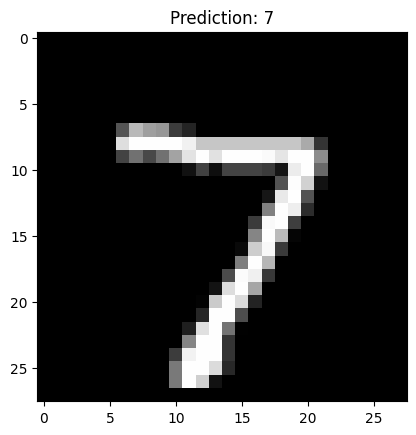

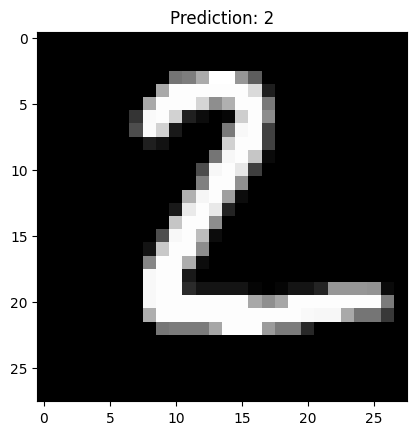

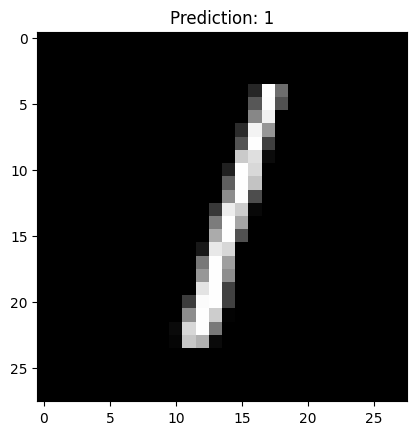

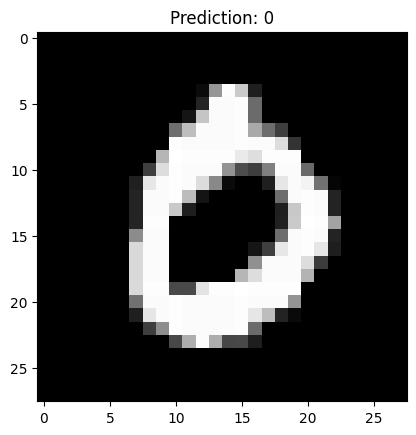

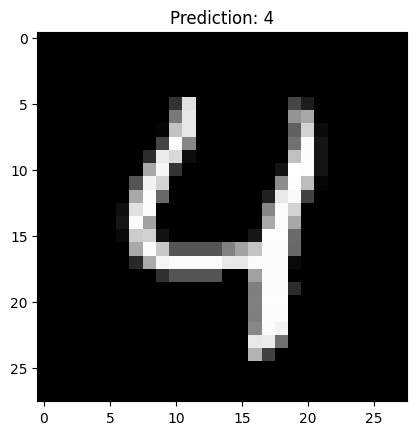

In [18]:
predictions = model.predict(x_test)
predicted_labels = [np.argmax(pred) for pred in predictions]

for i in range(5):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'Prediction: {predicted_labels[i]}')
    plt.show()


##Results
- The trained ANN achieved a test accuracy of approximately 98%.
- The training and validation accuracy and loss curves showed that the model learned effectively without significant overfitting.
- The model made accurate predictions on the test images, demonstrating its ability to generalize well on unseen data.
##Conclusion
This project successfully demonstrates the application of an Artificial Neural Network for classifying handwritten digits using the MNIST dataset. The model achieved high accuracy and showcased the potential of deep learning techniques in computer vision tasks.

